In [4]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.types import Row
from datetime import datetime
import numpy as np
import pandas as pd

In [5]:
spark = SparkSession.builder.appName("LondonCrime").getOrCreate()

In [6]:
data = spark.read.format("CSV").option("header","true").load("london_crime_by_lsoa.csv")

In [7]:
data.printSchema()

root
 |-- lsoa_code: string (nullable = true)
 |-- borough: string (nullable = true)
 |-- major_category: string (nullable = true)
 |-- minor_category: string (nullable = true)
 |-- value: string (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)



In [8]:
data.count()

13490604

In [9]:
data.limit(5).show()

+---------+----------+--------------------+--------------------+-----+----+-----+
|lsoa_code|   borough|      major_category|      minor_category|value|year|month|
+---------+----------+--------------------+--------------------+-----+----+-----+
|E01001116|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|E01001646| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|E01000677|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01003774| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|E01004563|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
+---------+----------+--------------------+--------------------+-----+----+-----+



In [10]:
tot_borough = data.select("borough").distinct()

In [11]:
tot_borough.show()

+--------------------+
|             borough|
+--------------------+
|             Croydon|
|          Wandsworth|
|              Bexley|
|             Lambeth|
|Barking and Dagenham|
|              Camden|
|           Greenwich|
|              Newham|
|       Tower Hamlets|
|            Hounslow|
|              Barnet|
|              Harrow|
|Kensington and Ch...|
|           Islington|
|               Brent|
|            Haringey|
|             Bromley|
|              Merton|
|         Westminster|
|             Hackney|
+--------------------+
only showing top 20 rows



In [12]:
hackney_data = data.filter(data["borough"] == "Hackney")
hackney_data.show(5)

+---------+-------+--------------------+--------------------+-----+----+-----+
|lsoa_code|borough|      major_category|      minor_category|value|year|month|
+---------+-------+--------------------+--------------------+-----+----+-----+
|E01001786|Hackney|     Criminal Damage|Criminal Damage T...|    0|2011|    6|
|E01001794|Hackney|Violence Against ...|          Harassment|    1|2013|    2|
|E01001787|Hackney|     Criminal Damage|Other Criminal Da...|    0|2011|    7|
|E01001738|Hackney|Violence Against ...|        Wounding/GBH|    0|2013|   12|
|E01001807|Hackney|  Theft and Handling|  Other Theft Person|    0|2016|    8|
+---------+-------+--------------------+--------------------+-----+----+-----+
only showing top 5 rows



In [13]:
data_2015_2016 = data.filter(data["year"].isin(["2015"]))
data_2015_2016.count()

1498956

In [15]:
data_2015_2016.select("lsoa_code" ,"borough","major_category","minor_category","year","month").coalesce(5).write.option("header","true").csv("amol_export_part.csv")

In [16]:
data_2015_2016.createOrReplaceTempView('records')

In [18]:
all_records = spark.sql('SELECT * FROM records')
all_records.show(5)

+---------+---------+--------------------+--------------------+-----+----+-----+
|lsoa_code|  borough|      major_category|      minor_category|value|year|month|
+---------+---------+--------------------+--------------------+-----+----+-----+
|E01000677|  Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01003076|  Lambeth|Violence Against ...|      Other violence|    0|2015|    4|
|E01001972| Haringey|Violence Against ...|        Wounding/GBH|    0|2015|   12|
|E01002634| Hounslow|     Criminal Damage|Criminal Damage T...|    0|2015|    2|
|E01003947|Southwark|               Drugs| Possession Of Drugs|    0|2015|    3|
+---------+---------+--------------------+--------------------+-----+----+-----+
only showing top 5 rows



In [19]:
spark.sql('SELECT * FROM records WHERE year = 2015 and month = 5').show()

+---------+--------------------+--------------------+--------------------+-----+----+-----+
|lsoa_code|             borough|      major_category|      minor_category|value|year|month|
+---------+--------------------+--------------------+--------------------+-----+----+-----+
|E01000677|             Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01002857|Kensington and Ch...|Other Notifiable ...|    Other Notifiable|    0|2015|    5|
|E01001775|             Hackney|Violence Against ...| Assault with Injury|    2|2015|    5|
|E01003112|             Lambeth|               Drugs|    Drug Trafficking|    0|2015|    5|
|E01003465|              Merton|Violence Against ...|          Harassment|    0|2015|    5|
|E01003631|              Newham|     Sexual Offences|                Rape|    0|2015|    5|
|E01003312|            Lewisham|               Drugs| Possession Of Drugs|    0|2015|    5|
|E01002364|            Havering|  Theft and Handling|         Other Theft|    0|

In [20]:
spark.sql('SELECT year , month , count(*) FROM records GROUP BY year , month').show()

+----+-----+--------+
|year|month|count(1)|
+----+-----+--------+
|2015|   11|  124913|
|2015|    5|  124913|
|2015|    4|  124913|
|2015|    8|  124913|
|2015|    1|  124913|
|2015|    2|  124913|
|2015|    3|  124913|
|2015|   10|  124913|
|2015|    6|  124913|
|2015|    9|  124913|
|2015|   12|  124913|
|2015|    7|  124913|
+----+-----+--------+



In [21]:
spark.sql('SELECT * FROM records WHERE year = 2015 and month = 5').coalesce(1).write.option("header","true").csv("amol_export_sql.csv")

In [22]:
data_import = spark.read.format("CSV").option("header","true").load("amol_export_sql.csv")
data_import.count()

124913

In [23]:
data_import.show(30)

+---------+--------------------+--------------------+--------------------+-----+----+-----+
|lsoa_code|             borough|      major_category|      minor_category|value|year|month|
+---------+--------------------+--------------------+--------------------+-----+----+-----+
|E01000677|             Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01002857|Kensington and Ch...|Other Notifiable ...|    Other Notifiable|    0|2015|    5|
|E01001775|             Hackney|Violence Against ...| Assault with Injury|    2|2015|    5|
|E01003112|             Lambeth|               Drugs|    Drug Trafficking|    0|2015|    5|
|E01003465|              Merton|Violence Against ...|          Harassment|    0|2015|    5|
|E01003631|              Newham|     Sexual Offences|                Rape|    0|2015|    5|
|E01003312|            Lewisham|               Drugs| Possession Of Drugs|    0|2015|    5|
|E01002364|            Havering|  Theft and Handling|         Other Theft|    0|

In [24]:
result_pdf = data_import.select("*").toPandas()

In [28]:
result_pdf

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
1,E01002857,Kensington and Chelsea,Other Notifiable Offences,Other Notifiable,0,2015,5
2,E01001775,Hackney,Violence Against the Person,Assault with Injury,2,2015,5
3,E01003112,Lambeth,Drugs,Drug Trafficking,0,2015,5
4,E01003465,Merton,Violence Against the Person,Harassment,0,2015,5
5,E01003631,Newham,Sexual Offences,Rape,0,2015,5
6,E01003312,Lewisham,Drugs,Possession Of Drugs,0,2015,5
7,E01002364,Havering,Theft and Handling,Other Theft,0,2015,5
8,E01001507,Enfield,Theft and Handling,Theft From Motor Vehicle,3,2015,5
9,E01003645,Redbridge,Drugs,Drug Trafficking,0,2015,5


In [42]:
result_pdf.iloc[0:5 , 2:4]

,major_category,minor_category
0,Violence Against the Person,Other violence
1,Other Notifiable Offences,Other Notifiable
2,Violence Against the Person,Assault with Injury
3,Drugs,Drug Trafficking
4,Violence Against the Person,Harassment


In [55]:
result_pdf

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
1,E01002857,Kensington and Chelsea,Other Notifiable Offences,Other Notifiable,0,2015,5
2,E01001775,Hackney,Violence Against the Person,Assault with Injury,2,2015,5
3,E01003112,Lambeth,Drugs,Drug Trafficking,0,2015,5
4,E01003465,Merton,Violence Against the Person,Harassment,0,2015,5
5,E01003631,Newham,Sexual Offences,Rape,0,2015,5
6,E01003312,Lewisham,Drugs,Possession Of Drugs,0,2015,5
7,E01002364,Havering,Theft and Handling,Other Theft,0,2015,5
8,E01001507,Enfield,Theft and Handling,Theft From Motor Vehicle,3,2015,5
9,E01003645,Redbridge,Drugs,Drug Trafficking,0,2015,5


In [74]:
abc  = result_pdf.groupby('major_category').count()
plot_data = abc.iloc[:5 ,1:2]

In [76]:
plot_data


,borough
major_category,
Burglary,9663
Criminal Damage,19159
Drugs,10921
Fraud or Forgery,2190
Other Notifiable Offences,7188


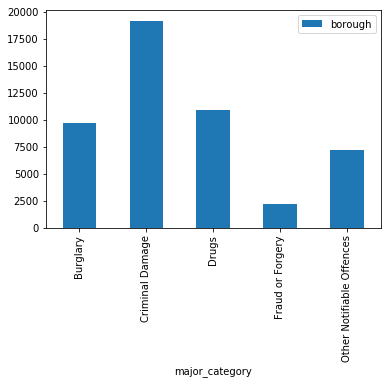

In [77]:
plot_data.plot.bar()